
# Linear Regression or Random Forest: How to beat the stock market

##Table of contents

*   Introduction
*   I - Linear Regression
*   II - Random Forest Classifier
*   III - Summary





###Introduction

If you are looking a quick way to make billions using Machine Learning to beat the market, well... I have you bad news: The title was a clic bait

But, nevertheless, here you will find two ways to comprehend, in a better way, how to use this tools to use the stock value data in your benefit.

My goal is to show a bit of what python can allow us to do with these kind of databases, from extracting information to deduce possible actions based on the behavior of data over time.

Let's have fun.

I - Linear Regression

We are going to check what type of information these databases contains (variables and observations) and their important characteristics (column names, shape of the dataset, etc.)

In [1]:
#Importing packages to work with our database
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math 

In [2]:
#In a first time, we will use LinearRegression from sklearn to model our data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#In this case we will use data from a company called "APPLE INC" (not a very notorious one), but you can use whatever data that you want 
#(if the columns and type of value fits of course)
dataset = pd.read_csv('AAPL.csv')

In [4]:
#The size of our database
dataset.shape

(10661, 7)

In [5]:
#What contains our database
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10657.000000,10624.000000,10641.000000,10626.000000,10652.000000,1.065200e+04
mean,17.168431,17.396769,16.970538,17.205928,16.482386,3.263916e+08
std,36.319211,36.802183,35.911353,36.383768,36.003748,3.375762e+08
min,0.049665,0.049665,0.049107,0.049107,0.038154,0.000000e+00
25%,0.287946,0.299107,0.282366,0.291127,0.238217,1.201032e+08
50%,0.491071,0.500000,0.482143,0.491071,0.405302,2.136428e+08
75%,16.596071,16.795983,16.355356,16.651965,14.321080,4.062142e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [6]:
#Here we can see that our database contains some null values, so we will need to 
#fix those missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10661 entries, 0 to 10660
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10661 non-null  object 
 1   Open       10657 non-null  float64
 2   High       10624 non-null  float64
 3   Low        10641 non-null  float64
 4   Close      10626 non-null  float64
 5   Adj Close  10652 non-null  float64
 6   Volume     10652 non-null  float64
dtypes: float64(6), object(1)
memory usage: 583.1+ KB


In [7]:
dataset.isnull().sum()

Date          0
Open          4
High         37
Low          20
Close        35
Adj Close     9
Volume        9
dtype: int64

In [8]:
#we will replace the missing values with a mean value for each column
dataset['Open'] = dataset['Open'].fillna(round(dataset['Open'].mean(),0))
dataset['High'] = dataset['High'].fillna(round(dataset['High'].mean(),0))
dataset['Low'] = dataset['Low'].fillna(round(dataset['Low'].mean(),0))
dataset['Close'] = dataset['Close'].fillna(round(dataset['Close'].mean(),0))
dataset['Volume'] = dataset['Volume'].fillna(round(dataset['Volume'].mean(),0))
dataset['Adj Close'] = dataset['Adj Close'].fillna(round(dataset['Adj Close'].mean(),0))

In [9]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#putting the date column as a index for later work
dataset = dataset.set_index('Date')

<Axes: title={'center': 'APPLE stock values'}, xlabel='Date', ylabel='Price'>

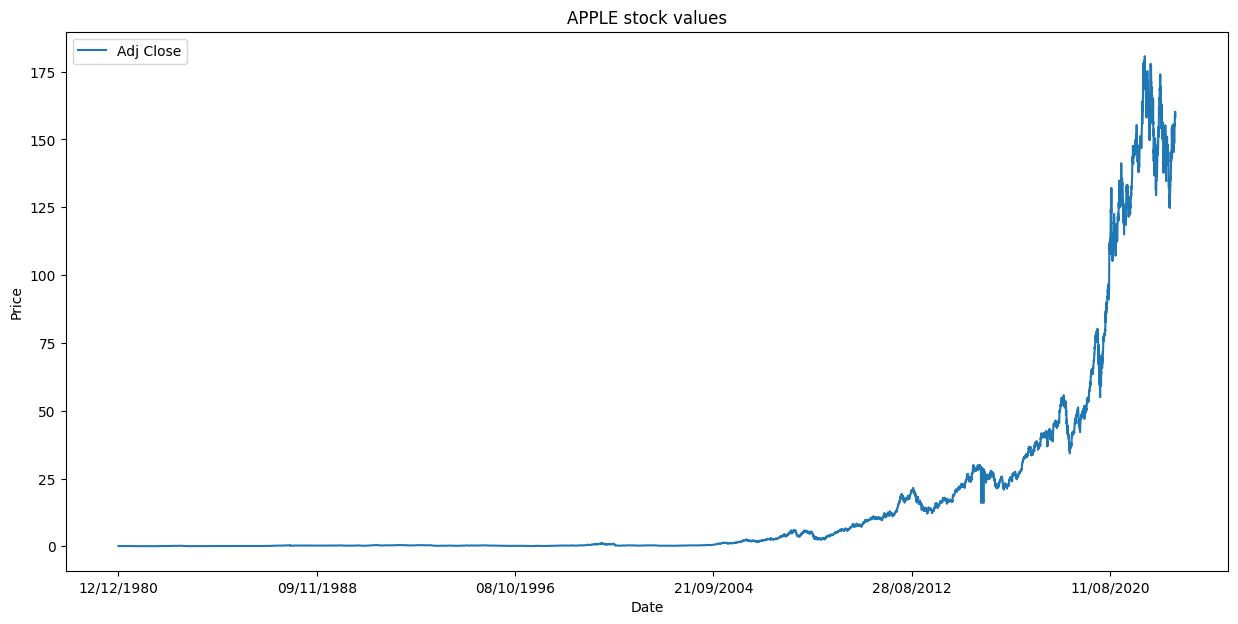

In [11]:
#Let's see the stock behaviour through the time
dataset.plot.line(y = 'Adj Close', use_index = True, figsize = (15,7), ylabel = 'Price', title = 'APPLE stock values')


In [12]:
#Now it's time to select the data for our Linear Regression
X = dataset[['Open','High',	'Low','Volume']].values
y = dataset['Adj Close'].values

In [13]:
#Using test split we will separate our data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
#Establishing our model
regressor = LinearRegression()

In [15]:
#Fitting our model with our train data
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
#Obtaining the coefficients of our Linear regression
print(regressor.coef_)

[ 3.83834808e-01  1.89084083e-01  4.19630865e-01 -2.54375687e-10]


In [17]:
#Obtaining our intercept
print(regressor.intercept_)

-0.4344850198640131


In [18]:
#Putting a prove our model
prediction = regressor.predict(X_test)

In [19]:
#Looking our results
print(prediction)

[-3.26390340e-01 -2.12548292e-01  2.67946965e+01 ... -1.81828970e-03
  3.28557806e-01  3.10797431e+01]


In [20]:
#Let's create a new dataframe with two columns: one for our test data, and
#one for our predictions
df = pd.DataFrame({'Actual:':y_test.flatten(), 'Predicted:':prediction.flatten()})

In [21]:
#More easy to compare
df.info

<bound method DataFrame.info of         Actual:  Predicted:
0      0.086714   -0.326390
1      0.221443   -0.212548
2     25.710670   26.794696
3     16.646982   18.847998
4      0.526782   -0.087050
...         ...         ...
2128   0.136787   -0.294449
2129   0.310602   -0.132424
2130   0.417803   -0.001818
2131   0.750903    0.328558
2132  28.377945   31.079743

[2133 rows x 2 columns]>

In [22]:
#An important thing to check are the Mean Errors of our model
print('Mean Absolute Error:', metrics.mean_absolute_error(df['Actual:'], df['Predicted:']))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(df['Actual:'], df['Predicted:'])*100, '%')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))




Mean Absolute Error: 0.7941281642839946
Mean Absolute percentage Error: 156.9987703607412 %
Mean Squared Error: 2.2957397076089494
Root Mean Squared Error: 1.515169860975643


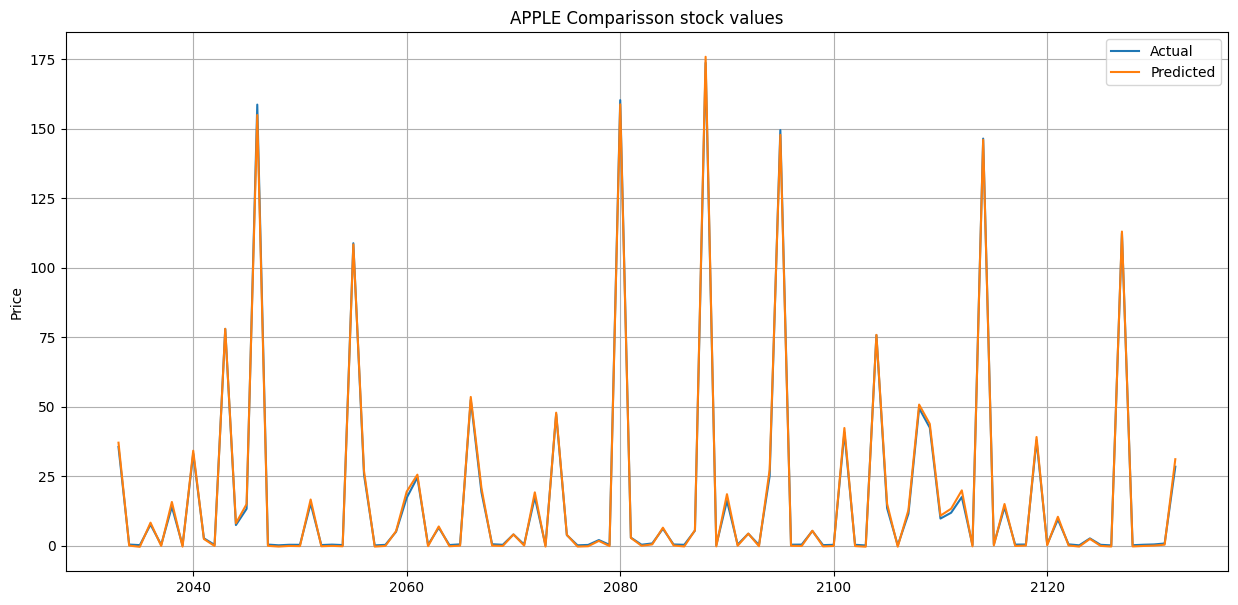

In [23]:
#But a better way to see this comparisson is with a plot
plt.figure(figsize=(15, 7))
plt.plot(df['Actual:'].tail(100), label = 'Actual')
plt.plot(df['Predicted:'].tail(100), label = 'Predicted')
plt.ylabel('Price')
plt.title('APPLE Comparisson stock values')
plt.legend(loc = 'best')
plt.grid()
plt.show()

II - Random Forest Classifier

In this case, what we are looking is to predict the tendency of the stock value (if the value increasses or decreasses) in a certain period of time.

In [24]:
from sklearn.ensemble import RandomForestClassifier

#With this score we can indicate how percentage of the time we 
#obtain the correct target (if the stock value rised, we predict 
#that the stock value will rise)
from sklearn.metrics import precision_score

In [25]:
#We will try to determine the stock value in the next day, so we will create
# the 'Tomorrow' column which will show us the next Adj Close value 
dataset['Tomorrow'] = dataset['Adj Close'].shift(-1)
dataset.head(5)

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
12/12/1980,0.128348,0.128906,0.128348,0.128348,0.099722,469033600.0,0.094519
15/12/1980,0.122210,0.122210,0.121652,0.121652,0.094519,175884800.0,0.087581
16/12/1980,0.113281,0.113281,0.112723,0.112723,0.087581,105728000.0,0.089749
17/12/1980,0.115513,0.116071,0.115513,0.115513,0.089749,86441600.0,0.092351
18/12/1980,0.118862,0.119420,0.118862,0.118862,0.092351,73449600.0,0.097987


In [26]:
#Now we'll create our 'Target' column, which will indicate if our stock value 
#increase (Target = 1)  or decrease (Target = 0) the next day
dataset['Target'] = (dataset['Tomorrow'] > dataset['Adj Close']).astype(int)
dataset.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
14/03/2023,151.279999,153.399994,150.100006,152.589996,152.589996,73695900.0,152.990005,1
15/03/2023,151.190002,153.250000,149.919998,152.990005,152.990005,77167900.0,155.850006,1
16/03/2023,152.160004,156.460007,151.639999,155.850006,155.850006,76161100.0,155.000000,0
17/03/2023,156.080002,156.740005,154.279999,155.000000,155.000000,98862500.0,157.399994,1
20/03/2023,155.070007,157.820007,154.149994,157.399994,157.399994,73641400.0,159.279999,1
21/03/2023,157.320007,159.399994,156.539993,159.279999,159.279999,73938300.0,157.830002,0
22/03/2023,159.300003,162.139999,157.809998,157.830002,157.830002,75701800.0,158.929993,1
23/03/2023,158.830002,161.550003,157.679993,158.929993,158.929993,67622100.0,160.250000,1
24/03/2023,158.860001,160.339996,157.850006,160.250000,160.250000,59196500.0,158.279999,0


In [27]:
#Let's define our model and their parameters
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [28]:
#To avoid use future data to predict a future stock value behavior, we need to 
#train with past info (iloc[:-100]) and then test with the rest of the info (iloc[-100:])
train = dataset.iloc[:-100]
test = dataset.iloc[-100:]

In [29]:
#Defining our predictors (columns to use)
predictors = ['Open','High',	'Low',	'Close',	'Volume']

In [30]:
#Fitting our model with our predictors and our target data
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=50, n_estimators=200, random_state=1)

In [31]:
#Obtaining our predicted values
preds = model.predict(test[predictors])

In [32]:
#we will transform preds from array to Series for an easy manipulation
preds = pd.Series(preds, index = test.index)
preds

Date
01/11/2022    0
02/11/2022    0
03/11/2022    1
04/11/2022    1
07/11/2022    1
             ..
21/03/2023    1
22/03/2023    0
23/03/2023    0
24/03/2023    1
27/03/2023    0
Length: 100, dtype: int64

In [33]:
#Calculating our prediction score
precision_score(test['Target'], preds)

0.5254237288135594

In [34]:
#We'll concatenate both columns in one dataframe.
#remember: axis = 1 means treat each one of these objects as a column
combined = pd.concat([test['Target'], preds], axis = 1)

<Axes: title={'center': 'APPLE Comparisson stock trends'}, xlabel='Date', ylabel='Trend'>

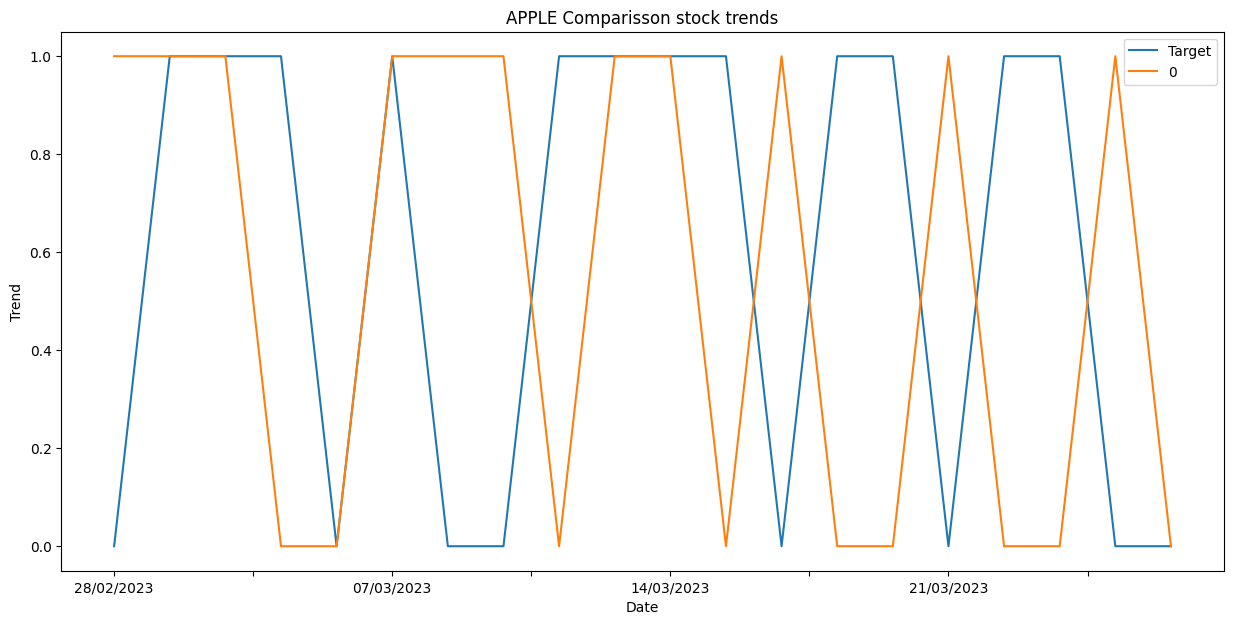

In [35]:
#Let's see, in a plot, the comparisson between our targets and our predictions
combined.tail(20).plot(figsize=(15, 7), ylabel = 'Trend', title = 'APPLE Comparisson stock trends')


In [36]:
#we will make a backtesting to use the old data in a better way, 
#so our model would obtain better results using the same data.
def predict (train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [39]:
#we'll create a backtest to predict in a movil range of days
#so, in this case, we will take a range of ten years (start = 2500)
#and will train models year by year (step = 250)
def backtest(data, model, predictors, start = 2500, step = 250):
  all_predictions = []
  for i in range(start, data.shape[0], step):
    #all of the time previous
    train = data.iloc[:i].copy()
    #all of the time posteriour
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [40]:
predictions = backtest(dataset, model, predictors)

In [41]:
#Here we will see how many times a type of prediction was made (0 or 1)
predictions['Predictions'].value_counts()

0.0    7066
1.0    1095
Name: Predictions, dtype: int64

In [43]:
#with this we have this new precision score, which is better than our previous 
#precision score calculated
precision_score(predictions['Target'], predictions['Predictions'])

0.5360730593607306

In [44]:
#This will give us the percentage of time that our model predict
#correctly the rise or fall in the value of the stock
predictions['Target'].value_counts()/predictions.shape[0]

1    0.507413
0    0.492587
Name: Target, dtype: float64

Impresive, but not enough. Now the idea is create more predictors and improve our accuracy

In [46]:
#We will create temporal horizons to look results and see the stock behaviour through the time (in days)
horizons = [2,5,60,250,1000]

In [47]:
new_predictors = []

for horizon in horizons:
  rolling_averages = dataset.rolling(horizon).mean()
  ratio_column = f"Close_Ratio_{horizon}"
  dataset[ratio_column] = dataset["Close"]/rolling_averages["Close"]

#we can look the trend of the stock value (see, in a given horizon, the Target Average)
  trend_column = f"Trend_{horizon}"
  dataset[trend_column] = dataset.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [48]:
#Now we'll see a lot of NaN in our dataset table, and that's because panda 
#cannot find enough days previous to the current row to execute the rolling process,
#so panda returns NaN
dataset

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
12/12/1980,0.128348,0.128906,0.128348,0.128348,0.099722,469033600.0,0.094519,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15/12/1980,0.122210,0.122210,0.121652,0.121652,0.094519,175884800.0,0.087581,0,0.973216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16/12/1980,0.113281,0.113281,0.112723,0.112723,0.087581,105728000.0,0.089749,1,0.961903,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17/12/1980,0.115513,0.116071,0.115513,0.115513,0.089749,86441600.0,0.092351,1,1.012224,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18/12/1980,0.118862,0.119420,0.118862,0.118862,0.092351,73449600.0,0.097987,1,1.014289,2.0,0.995331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21/03/2023,157.320007,159.399994,156.539993,159.279999,159.279999,73938300.0,157.830002,0,1.005937,2.0,1.020345,4.0,1.105228,36.0,1.061001,128.0,1.363832,529.0
22/03/2023,159.300003,162.139999,157.809998,157.830002,157.830002,75701800.0,158.929993,1,0.995427,1.0,1.004826,3.0,1.091934,36.0,1.051689,127.0,1.350153,528.0
23/03/2023,158.830002,161.550003,157.679993,158.929993,158.929993,67622100.0,160.250000,1,1.003473,1.0,1.007876,3.0,1.096123,37.0,1.059446,127.0,1.358284,528.0


In [49]:
#We will use drop.na to get rid of those NaN
dataset = dataset.dropna()

In [50]:
#With this new table we can see if our model improves
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [51]:
def predict (train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
   #Here we use .6 to show that the price goes up, so the model has a weight over
   #the raise in the stock value
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [52]:
#Doing the backtest again
predictions = backtest(dataset, model, new_predictors)

In [53]:
#Here we will see that we have less days to buy stocks (predictions = 1), but
# with a greater confidence than in the previous part
predictions["Predictions"].value_counts()

0.0    6718
1.0     442
Name: Predictions, dtype: int64

In [54]:
#Finally we can see that our score is higher than the previous one, and allows us to
# get more confidence to buy in those days when the predictions of the stock value shows an increment 
precision_score(predictions['Target'], predictions['Predictions'])

0.5565610859728507

#Summary



*   We started with a Linear Regression to predict the exact value of the stock:
    * Studying the dataset
    * Cleaning the dataset
    * Obtaining different metrics to evaluate the results
    * Ploting the results to compare predictions over data

*   We continue with a Random Forest Classifier to obtain trends in the stock value:
    * Cleaning the dataset
    * Setting up our Machine Learning Target
    * Training our initial model
    * Evaluating the error and create a backtest (to really evaluate the error over a period of time)
    * Improving our model with some extra columns

All of this is just to obtain some grade of comprehension over the data, looking for some trends that would indicate profit possibilities in case of buy stocks in a raise.

Obviously, beating the stock market is a pretty optimistic way to putting it, but have certain degree of knowledge about the market could be a good help to avoid taking actions merely at random



